In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [48]:
tips = pd.read_csv('Tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


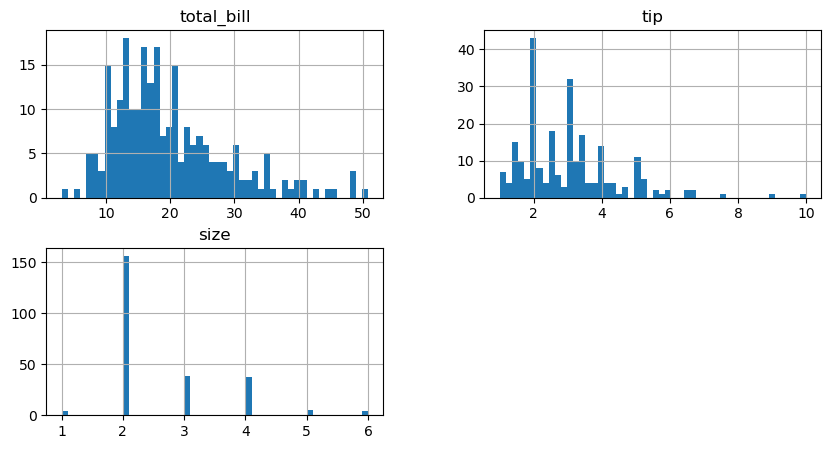

In [50]:
%matplotlib inline
tips.hist(bins=50, figsize=(10,5))
plt.show()

In [51]:
figure = px.scatter(data_frame = tips, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [52]:
figure = px.scatter(data_frame = tips, x="total_bill",
                    y="tip", size="size", color= "sex")
figure.show()

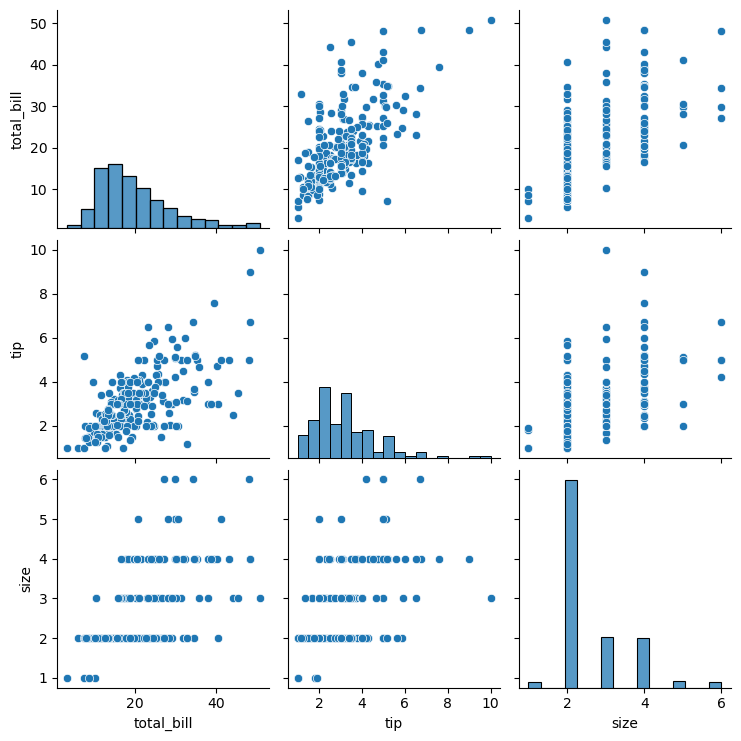

In [53]:
import seaborn as sb
sb.pairplot(tips)

In [54]:
tips['bill_per_person'] = tips['total_bill'] / tips['size']

In [55]:
corr_Matrix = tips.corr(numeric_only=True)
corr_Matrix["tip"].sort_values(ascending=False)

tip                1.000000
total_bill         0.675734
size               0.489299
bill_per_person    0.347393
Name: tip, dtype: float64

In [56]:
y = tips.tip.copy()
X = tips.drop('tip', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [65]:
tips_transform = make_column_transformer(
#         (StandardScaler(), ['total_bill','size']),
        ('passthrough',['total_bill','size','bill_per_person']),
        (OneHotEncoder(),['sex','smoker','day','time']),
    )
tips_prep = tips_transform.fit_transform(X_train)
tips_prep

array([[13.28      ,  2.        ,  6.64      , ...,  0.        ,
         1.        ,  0.        ],
       [24.27      ,  2.        , 12.135     , ...,  0.        ,
         1.        ,  0.        ],
       [27.28      ,  2.        , 13.64      , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 5.75      ,  2.        ,  2.875     , ...,  0.        ,
         1.        ,  0.        ],
       [34.63      ,  2.        , 17.315     , ...,  0.        ,
         1.        ,  0.        ],
       [44.3       ,  3.        , 14.76666667, ...,  0.        ,
         1.        ,  0.        ]])

In [59]:
ridge = Ridge()
param = {'alpha': [1,10,50,100], 'solver': ['svd', 'cholesky', 'lsqr'],}
grid_model = GridSearchCV(ridge, param)
grid_model.fit(tips_prep, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 10, 50, 100],
                         'solver': ['svd', 'cholesky', 'lsqr']})

In [60]:
scores = cross_val_score(grid_model, tips_prep, y_train, scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse = np.sqrt(-scores)

In [61]:
lin_reg_rmse.mean()

1.07988931337685

In [62]:
test = tips_transform.fit_transform(X_test)

In [63]:
grid_model.predict(test)

array([2.87117153, 2.02446749, 3.8739477 , 3.86204294, 2.27336188,
       2.70131744, 3.57054096, 2.31014838, 2.52318319, 2.46181744,
       2.81444644, 2.12019364, 2.15829318, 2.41835229, 1.68124084,
       3.09439563, 3.03716324, 3.08745388, 2.57557292, 5.77317456,
       3.38946576, 3.2402033 , 2.31805701, 2.01895684, 3.23866236,
       2.2605461 , 2.14893896, 3.2283584 , 3.04227801, 6.67961559,
       4.99060178, 1.78882466, 3.10824617, 2.83023599, 2.93954963,
       3.80327227, 2.19978385, 5.68694287, 2.36657544, 3.02773073,
       2.09861858, 2.47942958, 3.28411881, 2.29912024, 2.06858517,
       1.23928118, 2.00936776, 3.05116088, 1.91783464])